# Part 1: Data Visualization

In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv('Superstore.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit\
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136\
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.582\
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714\
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.031\
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164\


In [4]:
#cleaning Profit\ column:
df.rename(columns={'Profit\\':'Profit'} ,inplace=True)
df = df.replace(to_replace= r'\\', value= '', regex=True)
df = df.replace(to_replace= '}', value= '', regex=True)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.582
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.031
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
pd.to_numeric(df['Sales']).describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

In [7]:
a = [pd.to_numeric(df['Sales']).describe(), pd.to_numeric(df['Quantity']).describe(),
     pd.to_numeric(df['Discount']).describe(), pd.to_numeric(df['Profit']).describe()]
arr = np.array(a)
#running describe on all price-related attributes
#goal: generate a nice table for overview of price-related data
arr

array([[ 9.99400000e+03,  2.29858001e+02,  6.23245101e+02,
         4.44000000e-01,  1.72800000e+01,  5.44900000e+01,
         2.09940000e+02,  2.26384800e+04],
       [ 9.99400000e+03,  3.78957374e+00,  2.22510969e+00,
         1.00000000e+00,  2.00000000e+00,  3.00000000e+00,
         5.00000000e+00,  1.40000000e+01],
       [ 9.99400000e+03,  1.56202722e-01,  2.06451968e-01,
         0.00000000e+00,  0.00000000e+00,  2.00000000e-01,
         2.00000000e-01,  8.00000000e-01],
       [ 9.99400000e+03,  2.86568963e+01,  2.34260108e+02,
        -6.59997800e+03,  1.72875000e+00,  8.66650000e+00,
         2.93640000e+01,  8.39997600e+03]])

In [8]:
b = arr.T #transpose arr so that all means, SDs, etc. are grouped together
b

array([[ 9.99400000e+03,  9.99400000e+03,  9.99400000e+03,
         9.99400000e+03],
       [ 2.29858001e+02,  3.78957374e+00,  1.56202722e-01,
         2.86568963e+01],
       [ 6.23245101e+02,  2.22510969e+00,  2.06451968e-01,
         2.34260108e+02],
       [ 4.44000000e-01,  1.00000000e+00,  0.00000000e+00,
        -6.59997800e+03],
       [ 1.72800000e+01,  2.00000000e+00,  0.00000000e+00,
         1.72875000e+00],
       [ 5.44900000e+01,  3.00000000e+00,  2.00000000e-01,
         8.66650000e+00],
       [ 2.09940000e+02,  5.00000000e+00,  2.00000000e-01,
         2.93640000e+01],
       [ 2.26384800e+04,  1.40000000e+01,  8.00000000e-01,
         8.39997600e+03]])

In [9]:
price_and_quantity = {
    'Columns':["Sales","Quantity","Discount","Profit"],
    'Mean' : b[1],
    'SD':b[2],
    'Minimum':b[3],
    'Maximum': b[-1],
        
              }
index_labels=['r1', 'r2', 'r3', 'r4']
df2 = pd.DataFrame(price_and_quantity,index=index_labels)
print(df2)

     Columns        Mean          SD   Minimum    Maximum
r1     Sales  229.858001  623.245101     0.444  22638.480
r2  Quantity    3.789574    2.225110     1.000     14.000
r3  Discount    0.156203    0.206452     0.000      0.800
r4    Profit   28.656896  234.260108 -6599.978   8399.976


In [10]:
#plotting distribution of shipping times:
from datetime import datetime

In [11]:
ship_datetimes = [datetime.strptime(shipdate, "%m/%d/%Y") for shipdate in df['Ship Date']]
print(min(ship_datetimes), max(ship_datetimes)) #timestamp form: (Y, M, D, hr, min))

2014-01-07 00:00:00 2018-01-05 00:00:00


In [12]:
order_datetimes = [datetime.strptime(orderdate, "%m/%d/%Y") for orderdate in df['Order Date']]
ship_times = [(ship_datetimes[i]-order_datetimes[i]).days for i in range (len(ship_datetimes))]
ship_times
max(ship_times)
min(ship_times)
# ship_times.days
df3 = pd.DataFrame(ship_times)
df3.describe()

,0
count,9994.000000
mean,3.958175
std,1.747567
min,0.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,7.000000


In [13]:
# ship_times

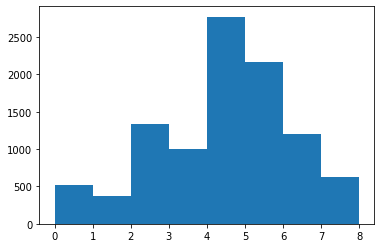

In [14]:
plt.hist(ship_times, bins = [0,1, 2, 3, 4, 5, 6, 7, 8]) #from before, we know that min = 0, max = 7
plt.show()

In [15]:
regions = df.Region.unique()
regions

array(['South', 'West', 'Central', 'East'], dtype=object)

In [16]:
south = df[df.Region == "South"]
west = df[df.Region == "West"]
central = df[df.Region == "Central"]
east = df[df.Region == "East"]

In [58]:
south.Category

0             Furniture
1             Furniture
3             Furniture
4       Office Supplies
12      Office Supplies
             ...       
9971    Office Supplies
9980          Furniture
9987         Technology
9988         Technology
9989          Furniture
Name: Category, Length: 1620, dtype: object

Histograms to check relative amounts of each category per region

<Figure size 432x288 with 0 Axes>

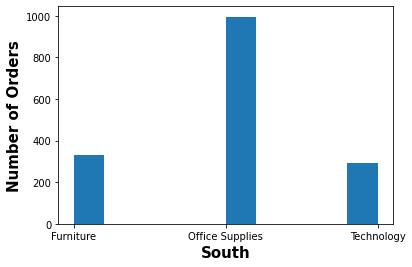

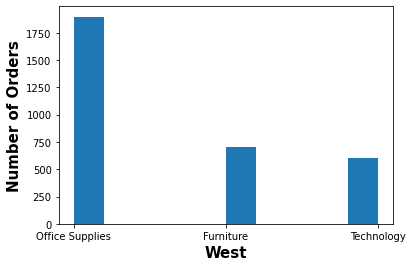

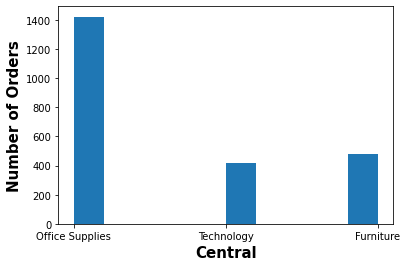

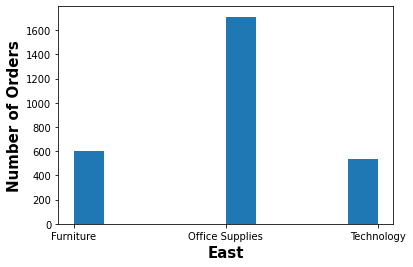

<Figure size 432x288 with 0 Axes>

In [60]:
plt.hist(south.Category)
plt.xlabel('South', fontweight ='bold', fontsize = 15)
plt.ylabel('Number of Orders', fontweight ='bold', fontsize = 15)
plt.figure()

plt.hist(west.Category)
plt.xlabel('West', fontweight ='bold', fontsize = 15)
plt.ylabel('Number of Orders', fontweight ='bold', fontsize = 15)
plt.figure()

plt.hist(central.Category)
plt.xlabel('Central', fontweight ='bold', fontsize = 15)
plt.ylabel('Number of Orders', fontweight ='bold', fontsize = 15)
plt.figure()

plt.hist(east.Category)
plt.xlabel('East', fontweight ='bold', fontsize = 15)
plt.ylabel('Number of Orders', fontweight ='bold', fontsize = 15)
plt.figure()

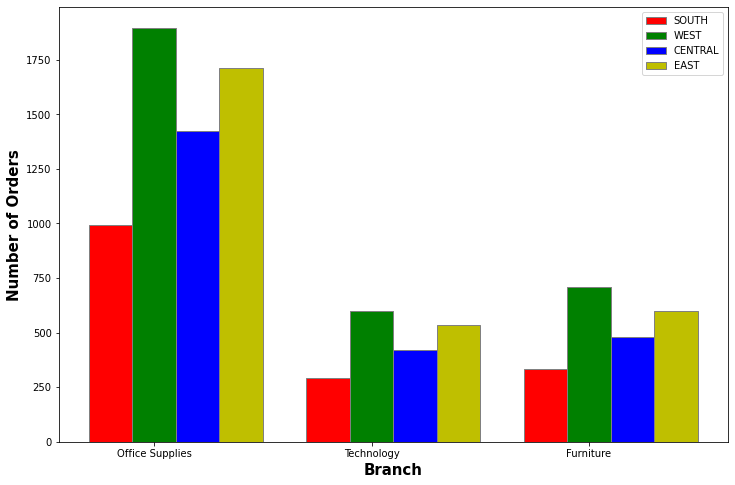

In [40]:
# set width of bar
barWidth = 0.20
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
SOUTH = [south[south.Category == 'Office Supplies'].shape[0], south[south.Category == 'Technology'].shape[0], south[south.Category == 'Furniture'].shape[0]]
WEST = [west[west.Category == 'Office Supplies'].shape[0], west[west.Category == 'Technology'].shape[0], west[west.Category == 'Furniture'].shape[0]]
CENTRAL = [central[central.Category == 'Office Supplies'].shape[0], central[central.Category == 'Technology'].shape[0], central[central.Category == 'Furniture'].shape[0]]
EAST = [east[east.Category == 'Office Supplies'].shape[0], east[east.Category == 'Technology'].shape[0], east[east.Category == 'Furniture'].shape[0]]
 
# Set position of bar on X axis
br1 = np.arange(len(SOUTH))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
 
# Make the plot
plt.bar(br1, SOUTH, color ='r', width = barWidth,
        edgecolor ='grey', label ='SOUTH')
plt.bar(br2, WEST, color ='g', width = barWidth,
        edgecolor ='grey', label ='WEST')
plt.bar(br3, CENTRAL, color ='b', width = barWidth,
        edgecolor ='grey', label ='CENTRAL')
plt.bar(br4, EAST, color ='y', width = barWidth,
        edgecolor ='grey', label ='EAST')
 
# Adding Xticks
plt.xlabel('Branch', fontweight ='bold', fontsize = 15)
plt.ylabel('Number of Orders', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(SOUTH))],
        ['Office Supplies', 'Technology', 'Furniture'])
 
plt.legend()
plt.show()

Bar chart to put it alll together: comparing order amounts over all regions

Overall, people from all regions overwhelmingly order office supplies more than any other category–makes sense, because furniture and technology are more expensive purchases, which should be made less frequently... The ratios between categories seem about the same, although the West places the most orders, while the South places the least.

Exploration of subcategories:

Text(0, 0.5, 'Number of Orders')

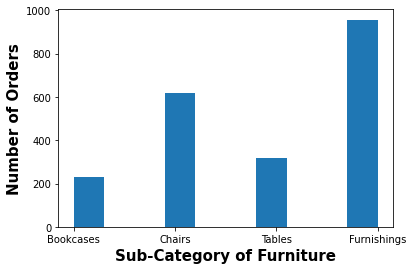

In [63]:
furniture = df[df.Category == "Furniture"]
plt.hist(furniture["Sub-Category"])
plt.xlabel('Sub-Category of Furniture', fontweight ='bold', fontsize = 15)
plt.ylabel('Number of Orders', fontweight ='bold', fontsize = 15)

Text(0, 0.5, 'Number of Orders')

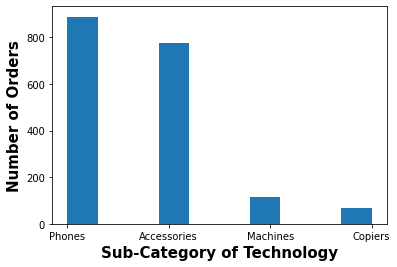

In [72]:
technology = df[df.Category == "Technology"]
plt.hist(technology["Sub-Category"])
plt.xlabel('Sub-Category of Technology', fontweight ='bold', fontsize = 15)
plt.ylabel('Number of Orders', fontweight ='bold', fontsize = 15)

Text(0, 0.5, 'Number of Orders')

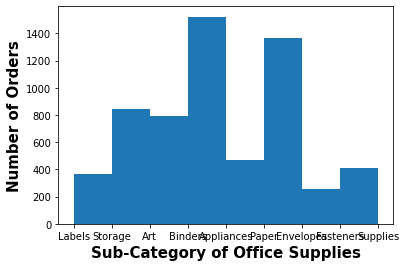

In [76]:
os = df[df.Category == "Office Supplies"]
plt.hist(os["Sub-Category"], bins = os['Sub-Category'].unique())
plt.xlabel('Sub-Category of Office Supplies', fontweight ='bold', fontsize = 15)
plt.ylabel('Number of Orders', fontweight ='bold', fontsize = 15)

In [74]:
os['Sub-Category'].unique() #bins here, because histogram doesn't have enough space

array(['Labels', 'Storage', 'Art', 'Binders', 'Appliances', 'Paper',
       'Envelopes', 'Fasteners', 'Supplies'], dtype=object)

# Plot 3: Map of Orders

Shows a map of all cities where orders are placed from

In [ ]:
# Import necessary packages
import os 
import folium
from folium import plugins
import rioxarray as rxr
import earthpy as et
import earthpy.spatial as es

# Import data from EarthPy
data = et.data.get_data('colorado-flood')

# Set working directory to earth-analytics
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

In [ ]:
m = folium.Map(location=[40.0150, -105.2705], tiles = 'Stamen Terrain')

m

In [ ]:
from geopy import geocoders
from geopy.geocoders import Nominatim

gn = geocoders.GeoNames(username='allisonzhuang')
geolocator = Nominatim(user_agent='allisonzhuang')



In [ ]:
cities = df.City.unique()
cities

In [ ]:
geolocator.geocode("Henderson")[1]

In [ ]:
location = geolocator.geocode("Athens", language = 'en-US')
location

In [ ]:
coordinates = []
for city in cities:
    coordinates.append([city, geolocator.geocode(city)[1]])

coordinates

In [ ]:
in_america = []

for coordinate in coordinates:
    print(coordinate)
    if(coordinate[1][0] < 50 and coordinate[1][0] > 24 and coordinate[1][1] < -63 and coordinate[1][1] > -125):
        in_america.append(coordinate)

in_america

In [ ]:
for coordinate in in_america:
    folium.Marker(
    location=coordinate[1], # coordinates for the marker
    popup=coordinate[0], # pop-up label for the marker
    icon=folium.Icon()
).add_to(m)
    
m

# Part 2: Data Exploration and Prediction

Trying to predict profit from Postal Code, Region, Category, Sales, Quantity, Discount–features selected based on my expectation of their importance.

In [ ]:
new_df = df.drop(columns=['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
        'Product ID', 'Sub-Category', 'Region', 'Category',
       'Product Name'])
#kept Postal Code	Region	Category	Sales	Quantity	Discount	Profit	

is_f = []
is_o = []
is_t = []

for cat in df.Category:
    if(cat == 'Furniture'):
        is_f.append(1)
        is_o.append(0)
        is_t.append(0)
    elif(cat == 'Office Supplies'):
        is_f.append(0)
        is_o.append(1)
        is_t.append(0)
    else:
        is_f.append(0)
        is_o.append(0)
        is_t.append(1)

        
new_df['Is Furniture'] = is_f
new_df['Is Office Supplies'] = is_o
#turn regions into dummy variables; need them to be numbers in order to use as attributes for linear regression

In [ ]:
new_df

In [ ]:
is_south = []
is_west = []
is_central = []
#last category is east; don't need a dummy variable because if all others are 0, that implies the region is east.

for reg in df.Region:
    if(reg == 'South'):
        is_south.append(1)
        is_west.append(0)
        is_central.append(0)
    elif(reg == 'West'):
        is_south.append(0)
        is_west.append(1)
        is_central.append(0)
    elif (reg == 'Central'):
        is_south.append(0)
        is_west.append(0)
        is_central.append(1)
    else:
        is_south.append(0)
        is_west.append(0)
        is_central.append(0)
        
new_df['Is South'] = is_south
new_df['Is West'] = is_west
new_df['Is Central'] = is_central

#dummy variables for region as well

In [ ]:
new_df

In [ ]:
new_df=new_df.astype(float)
#entries are currently strings–convert to floats

In [ ]:
import seaborn as sns
sns.histplot(data=new_df, x="Sales")

In [ ]:
sns.histplot(data=new_df, x="Profit")
#wide range of x-values for both sales and profits implies that there are some very big outliers

In [ ]:
#new_df['Discount_n']=new_df['Discount']*np.log(new_df['Sales'])

new_df['Discount_n']=new_df['Discount']*100
#normalizing discout so it's a percentage and the same order of magnitude as other attributes

y = new_df.Profit
df_x=new_df.drop(columns = ['Profit', 'Postal Code','Discount'])
df_x['Sales']=np.log(df_x['Sales'])
#normalizing sales to account for outliers

df_x.head()

In [ ]:
sns.histplot(data=df_x, x="Sales")

In [ ]:
sns.histplot(data=np.log(new_df), x="Profit")

After taking log of both profit and sales, our x-values seem to take on a normal distribution.

In [ ]:
x = df_x
x.head()

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
     x, y, test_size=0.20)
#split data into training and testing sets

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


#scale x, y because sales was orders of magnitude higher than the other attributes

In [ ]:
np.max(x_train)

In [ ]:
clf = Lasso()
clf.fit(x_train, y_train)

y_predictions = clf.predict(x_test)
y_predictions=np.exp(y_predictions)

print("Lasso:")
print(mean_squared_error(y_test, y_predictions))

ridge = Ridge(alpha=0.)
ridge.fit(x_train, y_train)

y_predictions = ridge.predict(x_test)
y_predictions=np.exp(y_predictions)


print("Ridge:")
print(mean_squared_error(y_test, y_predictions))

The above values represent the mean squared errors of our predictions–really high, let's try to predict based on category.

In [ ]:
print("Lasso parameters:" + str(clf.coef_))
print("Ridge parameters:" + str(ridge.coef_))

The lasso model eliminates Is Office Supplies and Is South, implying that those are completely irrelevant to predicting profit; Is Furniture has a strong negative relationship to profit, implying that furniture is often unprofitable. 

Looking at the 5th, 6th, and 7th coefficients, it looks like relative to orders from the East region, orders from the South generate roughly the same amount of profit, while those from the West generate slightly less, and those from the Central part of the US generate slightly more.

# Predicting Profits by Category

In [ ]:
new_df

In [ ]:
furniture = new_df[new_df['Is Furniture'] == 1]
furniture

In [ ]:
x = furniture.drop(columns = ['Profit', 'Postal Code'])
y = furniture.Profit

x_train, x_test, y_train, y_test = train_test_split(
     x, y, test_size=0.20)

In [ ]:
clf = Lasso()
clf.fit(x_train, y_train)

y_predictions = clf.predict(x_test)
y_predictions=np.exp(y_predictions)

In [ ]:
x_test

In [ ]:
y_predictions

In [ ]:
print("Lasso:")
print(mean_squared_error(y_test, y_predictions))

ridge = Ridge(alpha=0.)
ridge.fit(x_train, y_train)

y_predictions = ridge.predict(x_test)
y_predictions=np.exp(y_predictions)

print("Ridge:")
print(mean_squared_error(y_test, y_predictions))

Error is even higher–maybe profit is just too difficult to predict.

In [ ]:
print("Lasso parameters:" + str(clf.coef_))
print("Ridge parameters:" + str(ridge.coef_))

The lasso model eliminates parameters, Discount, Is Furniture, Is Office Supplies, Is South, and Is West, keeping Discount, Is Furniture, Is Office Supplies, Is South, and Is West... Is South is relatively high, implying that orders from the South region generally result in a higher profit.